In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_swig = pd.read_csv('swiggy.csv')

In [5]:
df_swig.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [7]:
df_swig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [8]:
df_swig.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [10]:
df_swig.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [11]:
top_10_city = df_swig['City']

# Extract the count of City and convert it to dataframe.
city_counts = top_10_city.value_counts().to_frame().reset_index()
city_counts.columns = ["City", "Occurences"] # update the column names
city_counts['Occurences']

0    1346
1    1277
2    1106
3    1090
4    1075
5     946
6     717
7     611
8     512
Name: Occurences, dtype: int64

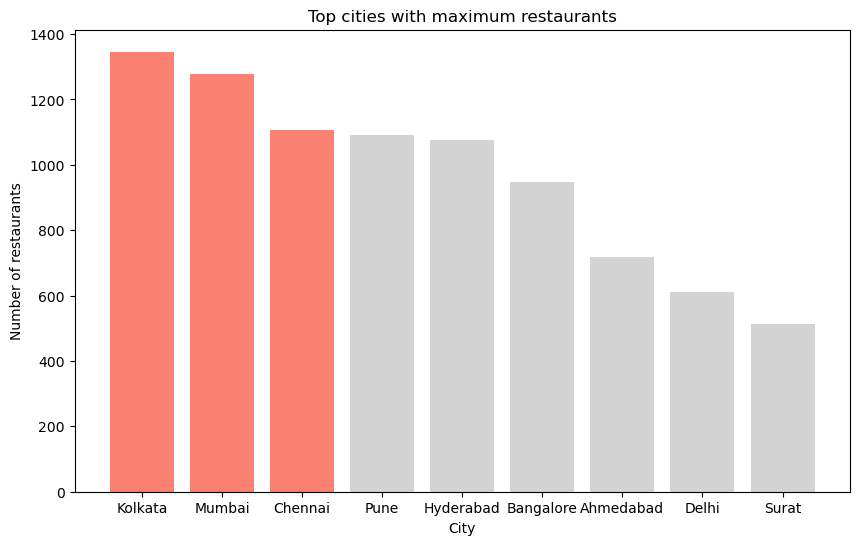

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# assign 'salmon' color to top 3 city
bar_colors = ["salmon" if i <3 else "lightgrey" for i in range(10)]

# create a bar plot
ax.bar(city_counts['City'], city_counts['Occurences'], color=bar_colors)
ax.set_title("Top cities with maximum restaurants")
ax.set_xlabel("City")
ax.set_ylabel("Number of restaurants");

C:\Users\MG\AppData\Local\Temp\ipykernel_8008\1195389647.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_area['Area'], rotation=45);


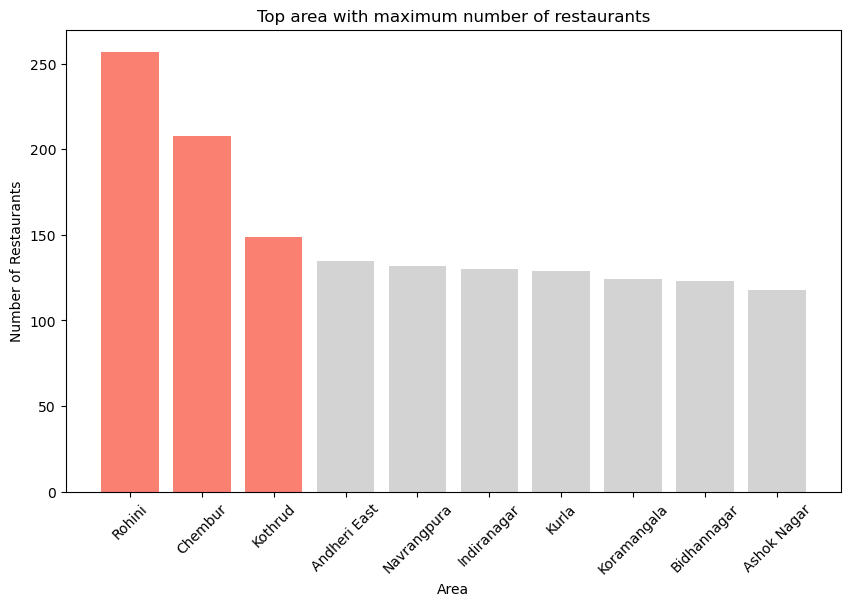

In [14]:
area = df_swig['Area']
area_counts = area.value_counts().to_frame().reset_index()
area_counts.columns = ['Area', 'Occurences']
top_10_area = area_counts[:10]

# Plotting graph
fig, ax = plt.subplots(figsize=(10,6))

bar_colors = ['salmon' if i<3 else 'lightgrey' for i in range(10)]

ax.bar(top_10_area['Area'], top_10_area['Occurences'], color=bar_colors)
ax.set_title("Top area with maximum number of restaurants")
ax.set_xlabel("Area")
ax.set_ylabel("Number of Restaurants")
ax.set_xticklabels(top_10_area['Area'], rotation=45);

In [15]:
food_type = df_swig['Food type'].to_frame()
food_type.columns = ['food_type']

# split the food_type values by `,` and put them into list. Then use explode to flattens the data
food_type = food_type.assign(food_type=food_type['food_type'].str.split(',')).explode('food_type')
food_type = food_type.reset_index(drop=True) # If we not use drop=True then we have multiple duplicate indices

# find the count of each food type
food_type_counts = food_type.value_counts().to_frame().reset_index()
food_type_counts.columns = ['food type', 'Occurence']

# extract the top 10
top_10_food_counts = food_type_counts[:10]
top_10_food_counts

,food type,Occurence
0,Chinese,2588
1,North Indian,1921
2,Indian,1772
3,Fast Food,1550
4,Beverages,1524
5,Desserts,1436
6,Biryani,1079
7,Snacks,1013
8,South Indian,857
9,Continental,686


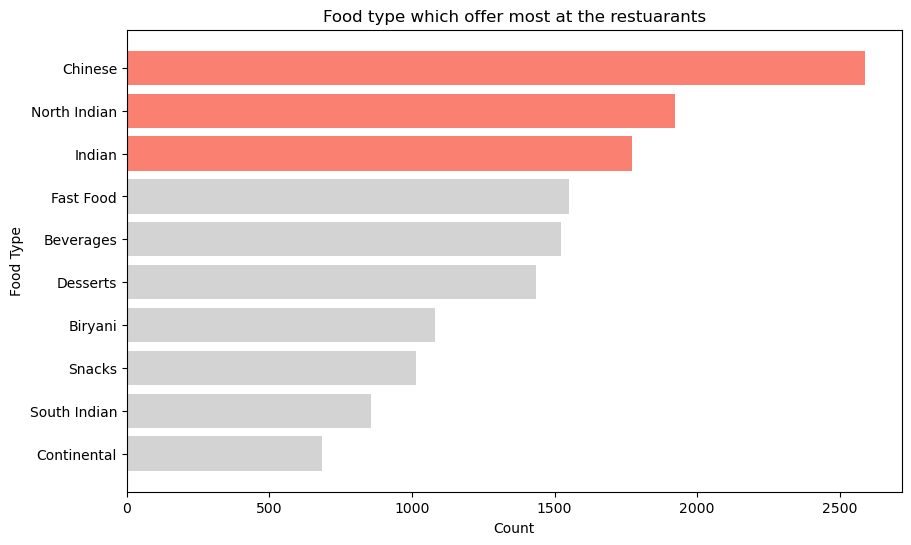

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

bar_colors = ['salmon' if i<3 else 'lightgrey' for i in range(10)]

ax.barh(top_10_food_counts['food type'], top_10_food_counts['Occurence'], color=bar_colors)
ax.set_title("Food type which offer most at the restuarants")
ax.set_xlabel("Count")
ax.set_ylabel("Food Type")
ax.invert_yaxis()

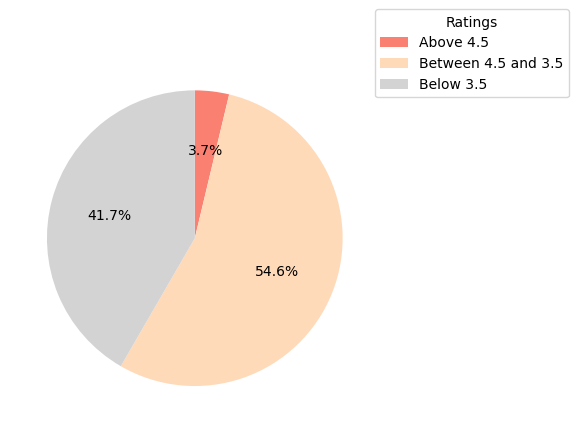

In [19]:
above_45 = df_swig[df_swig['Avg ratings']>4.5]
between_45_35 = df_swig[(df_swig['Avg ratings'] > 3.5) & (df_swig['Avg ratings'] <= 4.5)]
below_35 = df_swig[df_swig['Avg ratings'] <= 3.5]

percentage_above_45 = above_45.shape[0]/df_swig.shape[0]
percentage_between_45_35 = between_45_35.shape[0]/df_swig.shape[0]
percentage_below_35 = below_35.shape[0]/df_swig.shape[0]

labels = ['Above 4.5', 'Between 4.5 and 3.5', 'Below 3.5']
pie_colors = ['salmon', 'peachpuff', 'lightgrey']
fig, ax = plt.subplots()
ax.pie([percentage_above_45, percentage_between_45_35, percentage_below_35],
       colors=pie_colors,
       autopct='%1.1f%%',
       startangle=90,
       counterclock=False)

ax.legend(labels,title='Ratings', loc='center', bbox_to_anchor=(1.25,1));

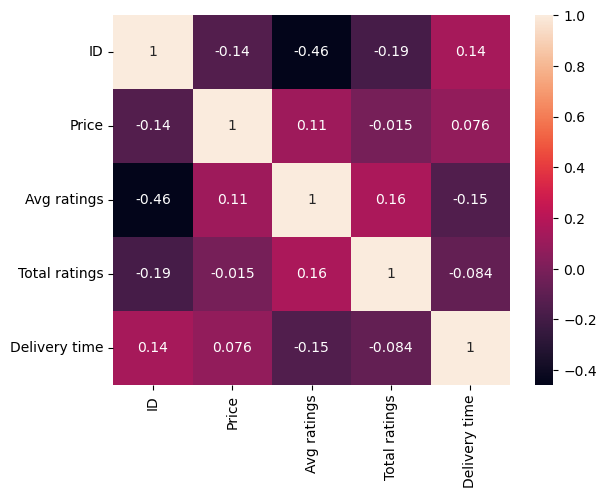

In [21]:
corr = df_swig.corr(numeric_only=True)
sns.heatmap(corr, annot=True);

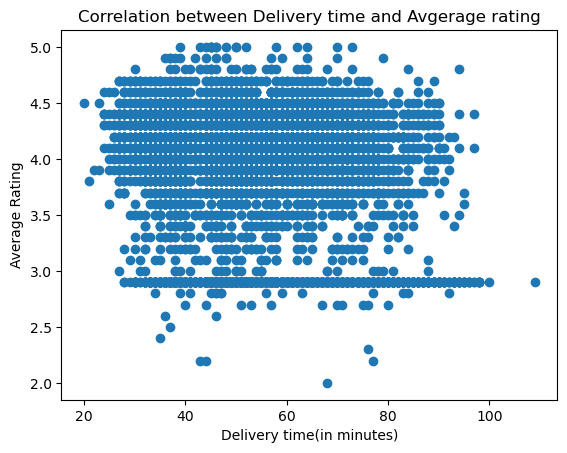

In [22]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=df_swig['Delivery time'], y=df_swig['Avg ratings']);
ax.set_title("Correlation between Delivery time and Avgerage rating")
ax.set_xlabel("Delivery time(in minutes)")
ax.set_ylabel("Average Rating");

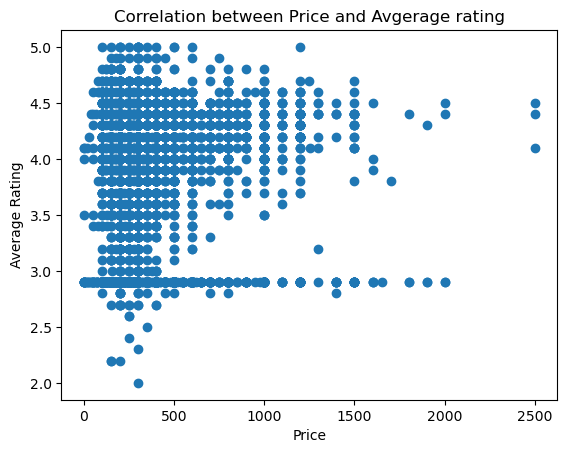

In [23]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=df_swig['Price'], y=df_swig['Avg ratings']);
ax.set_title("Correlation between Price and Avgerage rating")
ax.set_xlabel("Price")
ax.set_ylabel("Average Rating");